## Convolutional Neural Networks

In this assignment, we will learn about convolutional neural networks. We will create a CNN and learn to classify image data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization 
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

In [3]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In this lecture, we will use the image data generator to classify our data. The data is loaded below:

In [4]:
train_data_dir = '/content/drive/MyDrive/Thinkful/DL/dogs-vs-cats-processed/train/'
validation_data_dir = '/content/drive/MyDrive/Thinkful/DL/dogs-vs-cats-processed/test/'

img_width, img_height = 150, 150
batch_size = 80

In [5]:
#This block of code is used to ensure the input shape is correct

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

Define a train data generator with shear range of 0.3, zoom range of 0.1 and rescale to 1./255 (note that we must make 1 a float to produce a correct fraction). Use the ImageDataGenerator function.

In [6]:
# Answer below:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.1,
    horizontal_flip=True
)

Define a test data generator that only rescales to 1./255. Use the ImageDataGenerator function.

In [7]:
# Answer below:
test_datagen = ImageDataGenerator(rescale=1. /255)

The train generator and the test generator are defined below:

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 802 images belonging to 2 classes.


We'll start with a simple model. In CNNs, we first convolve the to extract features and then we add the dense layers. 

Create a model with one layer of convolution of size 64, one layer of activation, one layer of max pooling with pool size (2,2) and then one flattening layer, one dense layer of unit size 64 with a ReLU activation and one dense output layer. The output layer should have a sigmoid activation.

In [9]:
# Answer below:
base_model = Sequential()

base_model.add(Conv2D(64, (3,3), input_shape=input_shape)) #, strides=
base_model.add(Activation('relu'))
base_model.add(MaxPooling2D(pool_size=(2,2)))

base_model.add(Flatten())

base_model.add(Dense(64))
base_model.add(Activation('relu'))
base_model.add(Dropout(0.5))
base_model.add(Dense(1, activation='sigmoid'))

Compile the model using RMSprop.

In [10]:
# Answer below:
base_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Fit the model using a fit generator. Use 50 epochs, 25 training steps and ~~15~~ 10 validation steps

In [11]:
# Answer below:
nb_train_samples = 2000
nb_validation_samples = 800
batch_size = 80 

In [12]:
base_model_history = base_model.fit(
    train_generator,
    steps_per_epoch= nb_train_samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size
    )

Epoch 1/50
25/25 [==============================] - 24s 857ms/step - loss: 16.8931 - accuracy: 0.5297 - val_loss: 1.4413 - val_accuracy: 0.5013
Epoch 2/50
25/25 [==============================] - 21s 839ms/step - loss: 0.8048 - accuracy: 0.4905 - val_loss: 0.6990 - val_accuracy: 0.4950
Epoch 3/50
25/25 [==============================] - 21s 856ms/step - loss: 0.6882 - accuracy: 0.5192 - val_loss: 0.6846 - val_accuracy: 0.5063
Epoch 4/50
25/25 [==============================] - 21s 859ms/step - loss: 0.7046 - accuracy: 0.5339 - val_loss: 0.6690 - val_accuracy: 0.6050
Epoch 5/50
25/25 [==============================] - 21s 846ms/step - loss: 0.6983 - accuracy: 0.5289 - val_loss: 0.6610 - val_accuracy: 0.5863
Epoch 6/50
25/25 [==============================] - 21s 840ms/step - loss: 0.6827 - accuracy: 0.5633 - val_loss: 0.6871 - val_accuracy: 0.5587
Epoch 7/50
25/25 [==============================] - 21s 840ms/step - loss: 0.6563 - accuracy: 0.5881 - val_loss: 0.6443 - val_accuracy: 0.632

In [14]:
y_true = validation_generator.classes

In [15]:
base_model_y_pred = (base_model.predict(validation_generator, 10) > 0.5).flatten().astype("int32")

In [16]:
base_model_cm = confusion_matrix(y_true, base_model_y_pred)

Confusion matrix, without normalization
[[269 132]
 [ 95 306]]


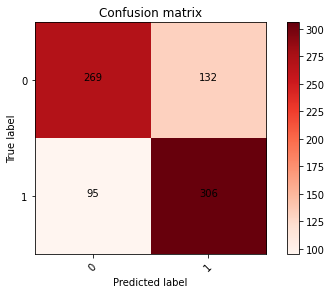

In [17]:
plot_confusion_matrix(base_model_cm, [0,1])

In [25]:
base_model_scores = {k:v[-1] for k,v in base_model_history.history.items()}
base_model_scores

{'accuracy': 0.8830000162124634,
 'loss': 0.26688677072525024,
 'val_accuracy': 0.7174999713897705,
 'val_loss': 0.9051521420478821}

Create a new model by adding an additional group of convolution, activation and max pooling layers before the flatten layer. Make the convolution layer of unit size 32. Keep everything else the same.

In [28]:
# Answer below:
model_dbl_conv = Sequential()

model_dbl_conv.add(Conv2D(64, (3,3), input_shape=input_shape))
model_dbl_conv.add(Activation('relu'))
model_dbl_conv.add(MaxPooling2D(pool_size=(2,2)))

model_dbl_conv.add(Conv2D(32, (3,3)))
model_dbl_conv.add(Activation('relu'))
model_dbl_conv.add(MaxPooling2D(pool_size=(2,2)))

model_dbl_conv.add(Flatten())

model_dbl_conv.add(Dense(64))
model_dbl_conv.add(Activation('relu'))
model_dbl_conv.add(Dropout(0.5))
model_dbl_conv.add(Dense(1, activation='sigmoid'))

Fit and compile the model in the same way you did with the previous model. How did the results improve?

In [29]:
# Answer below:
model_dbl_conv.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model_dbl_conv_history = model_dbl_conv.fit(
    train_generator,
    steps_per_epoch= nb_train_samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size
    )

Epoch 1/50
25/25 [==============================] - 23s 860ms/step - loss: 1.4435 - accuracy: 0.5014 - val_loss: 0.6885 - val_accuracy: 0.5650
Epoch 2/50
25/25 [==============================] - 21s 849ms/step - loss: 0.6881 - accuracy: 0.5487 - val_loss: 0.6669 - val_accuracy: 0.6125
Epoch 3/50
25/25 [==============================] - 21s 849ms/step - loss: 0.6823 - accuracy: 0.5808 - val_loss: 0.6489 - val_accuracy: 0.6075
Epoch 4/50
25/25 [==============================] - 21s 848ms/step - loss: 0.6726 - accuracy: 0.6292 - val_loss: 0.6277 - val_accuracy: 0.6825
Epoch 5/50
25/25 [==============================] - 21s 846ms/step - loss: 0.6300 - accuracy: 0.6630 - val_loss: 0.6614 - val_accuracy: 0.6363
Epoch 6/50
25/25 [==============================] - 22s 873ms/step - loss: 0.6135 - accuracy: 0.6720 - val_loss: 0.5975 - val_accuracy: 0.6637
Epoch 7/50
25/25 [==============================] - 22s 882ms/step - loss: 0.6221 - accuracy: 0.6692 - val_loss: 0.6500 - val_accuracy: 0.6200

In [30]:
model_dbl_conv_y_pred = (model_dbl_conv.predict(validation_generator, 10) > 0.5).flatten().astype("int32")

Confusion matrix, without normalization
[[253 148]
 [ 66 335]]


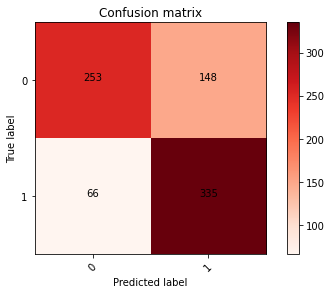

In [31]:
plot_confusion_matrix(confusion_matrix(y_true, model_dbl_conv_y_pred), [0,1])

In [32]:
model_dbl_conv_scores = {k:v[-1] for k,v in model_dbl_conv_history.history.items()}
model_dbl_conv_scores

{'accuracy': 0.9154999852180481,
 'loss': 0.19508028030395508,
 'val_accuracy': 0.7337499856948853,
 'val_loss': 0.8870292901992798}

Create a new model based on the model above. Add an additional dense layer of size 64 with a ReLU activation after the flatten layer.

In [33]:
# Answer below:
model_dbl_conv_den = Sequential()

model_dbl_conv_den.add(Conv2D(64, (3,3), input_shape=input_shape))
model_dbl_conv_den.add(Activation('relu'))
model_dbl_conv_den.add(MaxPooling2D(pool_size=(2,2)))

model_dbl_conv_den.add(Conv2D(32, (3,3)))
model_dbl_conv_den.add(Activation('relu'))
model_dbl_conv_den.add(MaxPooling2D(pool_size=(2,2)))

model_dbl_conv_den.add(Flatten())

model_dbl_conv_den.add(Dense(64))
model_dbl_conv_den.add(Activation('relu'))
model_dbl_conv_den.add(Dense(64))
model_dbl_conv_den.add(Activation('relu'))
model_dbl_conv_den.add(Dropout(0.5))
model_dbl_conv_den.add(Dense(1, activation='sigmoid'))

Fit and compile in the same way as above. Describe the difference in performance and speed.

In [34]:
# Answer below:
model_dbl_conv_den.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model_dbl_conv_den_history = model_dbl_conv_den.fit(
    train_generator,
    steps_per_epoch= nb_train_samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size
    )

Epoch 1/50
25/25 [==============================] - 24s 910ms/step - loss: 0.9495 - accuracy: 0.5152 - val_loss: 0.6831 - val_accuracy: 0.5925
Epoch 2/50
25/25 [==============================] - 22s 891ms/step - loss: 0.6859 - accuracy: 0.5651 - val_loss: 2.4587 - val_accuracy: 0.4988
Epoch 3/50
25/25 [==============================] - 22s 894ms/step - loss: 0.8500 - accuracy: 0.5753 - val_loss: 0.6773 - val_accuracy: 0.5562
Epoch 4/50
25/25 [==============================] - 22s 899ms/step - loss: 0.6871 - accuracy: 0.6093 - val_loss: 0.7281 - val_accuracy: 0.5163
Epoch 5/50
25/25 [==============================] - 22s 897ms/step - loss: 0.6590 - accuracy: 0.6334 - val_loss: 0.6362 - val_accuracy: 0.6850
Epoch 6/50
25/25 [==============================] - 22s 900ms/step - loss: 0.6308 - accuracy: 0.6583 - val_loss: 0.6359 - val_accuracy: 0.6388
Epoch 7/50
25/25 [==============================] - 23s 910ms/step - loss: 0.5978 - accuracy: 0.6855 - val_loss: 0.5796 - val_accuracy: 0.6975

In [35]:
model_dbl_conv_den_y_pred = (model_dbl_conv_den.predict(validation_generator, 10) > 0.5).flatten().astype("int32")

Confusion matrix, without normalization
[[291 110]
 [ 83 318]]


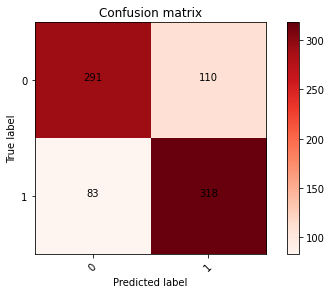

In [36]:
plot_confusion_matrix(confusion_matrix(y_true, model_dbl_conv_den_y_pred), [0,1])

In [37]:
model_dbl_conv_den_scores = {k:v[-1] for k,v in model_dbl_conv_den_history.history.items()}
model_dbl_conv_den_scores

{'accuracy': 0.9754999876022339,
 'loss': 0.07588648051023483,
 'val_accuracy': 0.7599999904632568,
 'val_loss': 1.6438654661178589}

Fit and compile using the Adam optimizer. Describe the difference in performance between the Adam and RMSprop optimizers.

In [38]:
# Answer below:
model_dbl_conv_den_adam = Sequential()

model_dbl_conv_den_adam.add(Conv2D(64, (3,3), input_shape=input_shape))
model_dbl_conv_den_adam.add(Activation('relu'))
model_dbl_conv_den_adam.add(MaxPooling2D(pool_size=(2,2)))

model_dbl_conv_den_adam.add(Conv2D(32, (3,3)))
model_dbl_conv_den_adam.add(Activation('relu'))
model_dbl_conv_den_adam.add(MaxPooling2D(pool_size=(2,2)))

model_dbl_conv_den_adam.add(Flatten())

model_dbl_conv_den_adam.add(Dense(64))
model_dbl_conv_den_adam.add(Activation('relu'))
model_dbl_conv_den_adam.add(Dense(64))
model_dbl_conv_den_adam.add(Activation('relu'))
model_dbl_conv_den_adam.add(Dropout(0.5))
model_dbl_conv_den_adam.add(Dense(1, activation='sigmoid'))


In [39]:
model_dbl_conv_den_adam.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dbl_conv_den_adam_history = model_dbl_conv_den_adam.fit(
    train_generator,
    steps_per_epoch= nb_train_samples // batch_size,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size
    )

Epoch 1/50
25/25 [==============================] - 23s 900ms/step - loss: 0.7558 - accuracy: 0.5113 - val_loss: 0.6931 - val_accuracy: 0.4963
Epoch 2/50
25/25 [==============================] - 22s 884ms/step - loss: 0.6929 - accuracy: 0.5093 - val_loss: 0.6930 - val_accuracy: 0.5088
Epoch 3/50
25/25 [==============================] - 22s 902ms/step - loss: 0.6941 - accuracy: 0.5214 - val_loss: 0.6928 - val_accuracy: 0.5587
Epoch 4/50
25/25 [==============================] - 22s 880ms/step - loss: 0.6930 - accuracy: 0.5339 - val_loss: 0.6922 - val_accuracy: 0.5437
Epoch 5/50
25/25 [==============================] - 22s 890ms/step - loss: 0.6874 - accuracy: 0.5689 - val_loss: 0.6906 - val_accuracy: 0.5962
Epoch 6/50
25/25 [==============================] - 22s 887ms/step - loss: 0.6890 - accuracy: 0.5517 - val_loss: 0.6638 - val_accuracy: 0.6250
Epoch 7/50
25/25 [==============================] - 22s 882ms/step - loss: 0.6693 - accuracy: 0.6328 - val_loss: 0.6566 - val_accuracy: 0.6325

In [40]:
model_dbl_conv_den_adam_y_pred = (model_dbl_conv_den_adam.predict(validation_generator, 10) > 0.5).flatten().astype("int32")

Confusion matrix, without normalization
[[254 147]
 [123 278]]


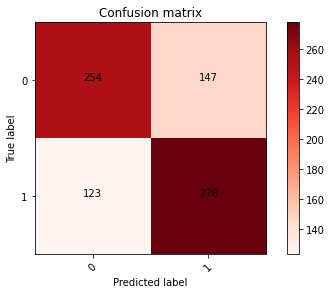

In [41]:
plot_confusion_matrix(confusion_matrix(y_true, model_dbl_conv_den_adam_y_pred), [0,1])

In [42]:
model_dbl_conv_den_adam_scores = {k:v[-1] for k,v in model_dbl_conv_den_adam_history.history.items()}
model_dbl_conv_den_adam_scores

{'accuracy': 0.984499990940094,
 'loss': 0.04458635672926903,
 'val_accuracy': 0.6637499928474426,
 'val_loss': 1.8871110677719116}

#Lecture Notes

In [ ]:
train_datagen_split = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.3,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
    )

train_generator_split = train_datagen_split.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
    )

validation_generator_split = train_datagen_split.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
    )